<a href="https://colab.research.google.com/github/allancae/log/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Importar as bibliotecas

# Manipulação e visualização de dados 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Importar bibliotecas do modelo e métricas de avaliação do modelo 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Importando os dados sobre câncer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df.shape

(569, 31)

# **Análise exploratória da base**

* conta a distribuição de frequência da variável target: 

  * df.target.value_counts(normalize = True)

* verifica dados faltantes
  * df.isna().sum()  





In [3]:
# distribuição de frequência da variável target

df.target.value_counts(normalize = True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [4]:
# verifica dados faltantes
# Não há dados faltantes

df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
# quantidade de valores únicos em cada coluna
# Conclusões: A target tem mesmo apenas 2 valores
df.nunique().sort_values()

target                       2
worst smoothness           411
mean symmetry              432
mean radius                456
worst radius               457
mean smoothness            474
mean texture               479
worst concave points       492
symmetry error             498
mean fractal dimension     499
worst symmetry             500
concave points error       507
worst texture              511
worst perimeter            514
texture error              519
mean perimeter             522
area error                 528
worst compactness          529
perimeter error            533
concavity error            533
worst fractal dimension    535
mean concavity             537
mean compactness           537
mean area                  539
worst concavity            539
radius error               540
compactness error          541
mean concave points        542
worst area                 544
fractal dimension error    545
smoothness error           547
dtype: int64

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
# Separar as variáveis explicativas da variável resposta

X = df.drop(columns= ['target'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = df["target"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [10]:
# Separar os dados de treino e teste 

SEED = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = SEED
                                                   )

In [11]:
# treino do modelo
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# previsão do label
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)
# probabilidade
y_pred_proba_train = log_reg.predict_proba(X_train)[:, 1]
y_pred_proba_test = log_reg.predict_proba(X_test)

In [24]:
pd.DataFrame(y_pred_proba_train)

,0
0,0.985446
1,0.096136
2,0.001281
3,0.004389
4,0.999852
...,...
393,0.993215
394,0.007758
395,0.864814
396,0.000155


In [25]:
# avaliação do modelo
accuracy_train_log = accuracy_score(y_train, y_pred_train)
accuracy_test_log = accuracy_score(y_test, y_pred_test)

accuracy_train_log, accuracy_test_log

(0.9547738693467337, 0.9181286549707602)

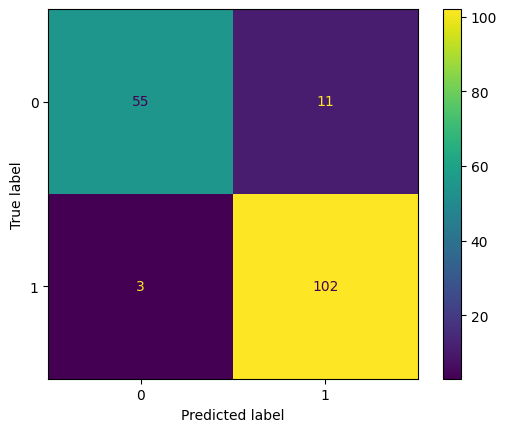

In [40]:

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred_test)

cm_display = ConfusionMatrixDisplay(matriz_confusao).plot()

In [23]:
# Calcular as probabilidades de previsão para os dados de treinamento


# Calcular a curva ROC e o KS
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)

ks = max(tpr - fpr)

# Interpretar o KS
print(f"Valor do KS: {ks}")

if ks > 0.5:
    print("O modelo possui um bom poder de discriminação.")
else:
    print("O modelo possui um poder de discriminação fraco.")

Valor do KS: 0.9181343770384865
O modelo possui um bom poder de discriminação.


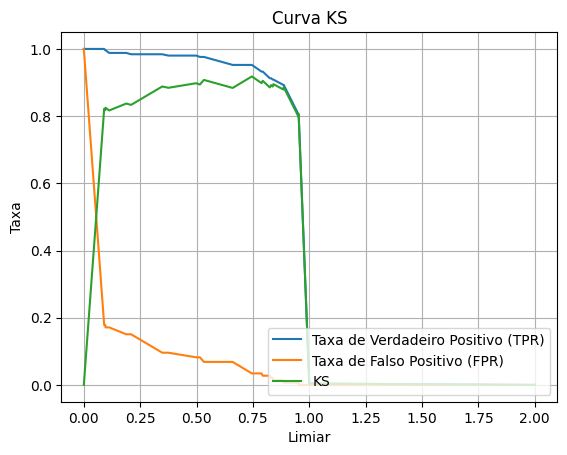

In [26]:
# Plotar a curva KS
plt.plot(thresholds, tpr, label='Taxa de Verdadeiro Positivo (TPR)')
plt.plot(thresholds, fpr, label='Taxa de Falso Positivo (FPR)')
plt.plot(thresholds, tpr - fpr, label='KS')
plt.xlabel('Limiar')
plt.ylabel('Taxa')
plt.title('Curva KS')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [29]:
# Calcular o Gini
gini = 2 * roc_auc_score(y_train, y_pred_proba_train) - 1

# Imprimir o valor do Gini
print(f"Valor do Gini: {gini}")

Valor do Gini: 0.9857577734290062


In [32]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)

# Calcular a AUC-ROC
auc_roc = roc_auc_score(y_train, y_pred_proba_train)

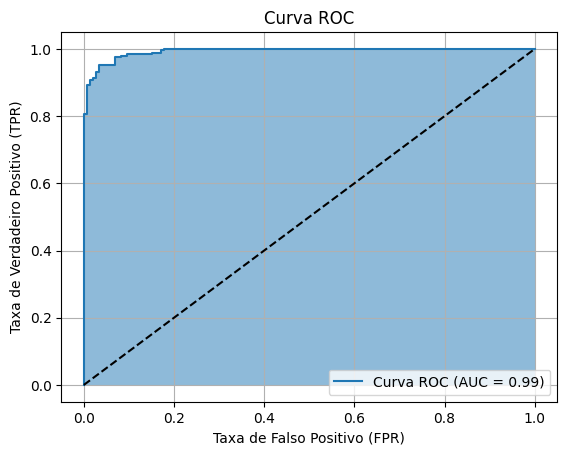

Valor do Gini: 0.9857577734290062


In [41]:
# Plotar a curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)

# Preencher a área sob a curva ROC
plt.fill_between(fpr, tpr, alpha=0.5)

plt.show()

print(f"Valor do Gini: {gini}")